# Tripadvisor hotel reviews

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
review=pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
review.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
review.isnull().sum()

Review    0
Rating    0
dtype: int64

In [5]:
review['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [6]:
review.shape

(20491, 2)

### Visualizing Rating feature

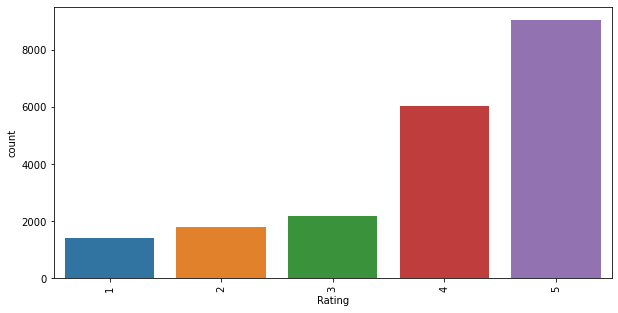

In [7]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(review['Rating'])

### Checks for empty review strings

In [8]:
review.loc[review["Review"] == ""] 

,Review,Rating


### Spliting the reviews into three parts using Sentiment analysis

In [9]:
pos = [5]
neg = [1, 2]
neu = [3, 4]

def sentiment(Rating):
  if Rating in pos:
    return 2
  elif Rating in neg:
    return 0
  else:
    return 1  
review['Sentiment'] = review['Rating'].apply(sentiment)
review.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,2
4,"great stay great stay, went seahawk game aweso...",5,2


### Visualizing Sentiment feature

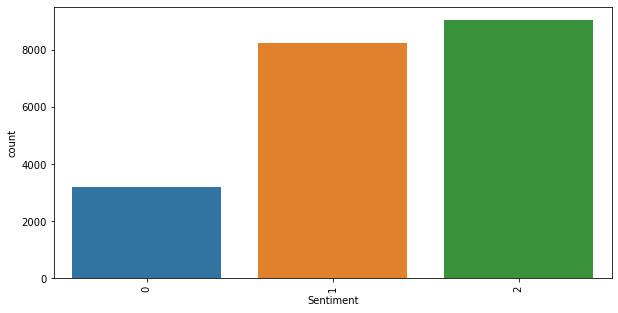

In [10]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(review['Sentiment'])

In [11]:
import nltk

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Text Preprocessing

1.Tokenization
2.Punctuation removal
3.Stopword removal
4.Lower casing

In [13]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove

def reviewParse(review):
    splitReview = review.split() #Split the review into words
    parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    return parsedReview #Returns the parsed review
  
def clean_review(review):
    clean_words = []
    splitReview = review.split()
    for w in splitReview:
        if w.isalpha() and w not in stopwords_list:
            clean_words.append(w.lower())
    clean_review = " ".join(clean_words)
    return clean_review

review["Review"] = review["Review"].apply(reviewParse).apply(clean_review) #Parse all the reviews for their punctuation and add it into a new column

review.head() #Take a peek at the dataset

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms experience hotel monaco seattle goo...,3,1
3,unique great stay wonderful time hotel monaco ...,5,2
4,great stay great stay went seahawk game awesom...,5,2


In [14]:
docs = list(review['Review'])
docs

['nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night',
 'ok nothing special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false adver

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 20000) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [16]:
tfidf_vectorizer.get_feature_names()

['aa',
 'aaa',
 'aalders',
 'aarp',
 'ab',
 'aback',
 'abandoned',
 'abba',
 'abbey',
 'abbreviated',
 'abc',
 'abdominal',
 'abe',
 'abel',
 'abide',
 'abiding',
 'ability',
 'abis',
 'abit',
 'able',
 'aboard',
 'aboslutely',
 'abou',
 'abound',
 'abounds',
 'abouti',
 'aboutthe',
 'aboveaverage',
 'abovethe',
 'abrasive',
 'abroad',
 'abrupt',
 'absence',
 'absent',
 'absoloutely',
 'absolut',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absorb',
 'absorbing',
 'absoultely',
 'absoulutely',
 'absoutely',
 'absurd',
 'absurdly',
 'abt',
 'abuela',
 'abundance',
 'abundant',
 'abundence',
 'abuse',
 'abused',
 'abut',
 'abysmal',
 'ac',
 'acacia',
 'academia',
 'academies',
 'academy',
 'acapulco',
 'accadamia',
 'accademia',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'acces',
 'accesible',
 'access',
 'accessable',
 'accessed',
 'accesses',
 'accessibility',
 'accessible',
 'accessing',
 'accessories',
 'accessthe',
 'accident',
 'accid

In [17]:
x = tfidf_vectorizer_vectors.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y = review['Sentiment']
y

0        1
1        0
2        1
3        2
4        2
        ..
20486    2
20487    1
20488    0
20489    0
20490    0
Name: Sentiment, Length: 20491, dtype: int64

In [19]:
len(x[0])

20000

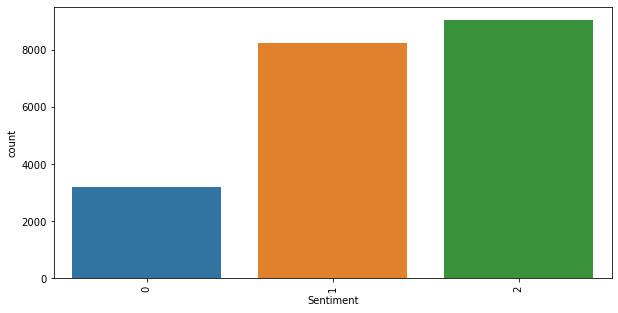

In [20]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(y)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=125)

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = logreg.predict(x_test)

In [24]:
y_pred

array([2, 1, 2, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 473,  168,   20],
       [  77, 1078,  441],
       [   9,  391, 1442]], dtype=int64)

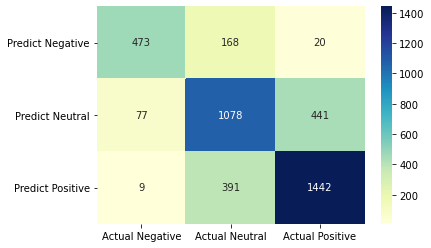

In [27]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=125)

cross_val_score(LogisticRegression(), x, y, cv=cv)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([0.73017809, 0.72700659, 0.72725055, 0.72432301, 0.72407904])

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f'Mean Absolute Error : {mean_absolute_error(y_pred,y_test)}')
print(f'Mean Squared Error : {mean_squared_error(y_pred,y_test)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_pred,y_test))}')
print(f'R-squared : {r2_score(y_test,y_pred)}')

Mean Absolute Error : 0.2768968040985606
Mean Squared Error : 0.29104659673091
Root Mean Squared Error : 0.5394873462194549
R-squared : 0.4483827251237331


NLP Its a new topic for me..
This is basic model where we can improve its accuracy in future.. 